In [ ]:
import os

In [ ]:
RANDOM_SEED = 42

In [ ]:
path_ = "../Spectrograms"
#path_ = "../Spectrograms-pure-bckg-no-filtering"

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
#Preparing images for model training --- image size = 256 x 256
train_batch = 64
test_batch = 64
train_set= image_dataset_from_directory(path_,
                                labels='inferred',
                                label_mode='binary',
                                batch_size=train_batch,
                                seed=RANDOM_SEED,
                                shuffle=True,
                                validation_split=0.2,
                                subset='training')
                                
val_set =  image_dataset_from_directory(path_,
                                labels='inferred',
                                label_mode='binary',
                                batch_size=test_batch,
                                seed=RANDOM_SEED,
                                shuffle=True,
                                validation_split=0.2,
                                subset='validation')

Found 10625 files belonging to 2 classes.
Using 8500 files for training.
Found 10625 files belonging to 2 classes.
Using 2125 files for validation.


In [ ]:
test_ds_size = int(34 * 0.5) 
test_test_set = val_set.take(test_ds_size)
test_set = val_set.skip(test_ds_size)

In [ ]:
val_set.__len__()

<tf.Tensor: shape=(), dtype=int64, numpy=34>

In [ ]:
train_set.__len__()

<tf.Tensor: shape=(), dtype=int64, numpy=133>

In [ ]:
test_set.__len__()

<tf.Tensor: shape=(), dtype=int64, numpy=17>

In [ ]:
from keras.layers import Dense, Flatten
from keras.models import Sequential, Model
from keras.callbacks import ModelCheckpoint
from keras import regularizers
from livelossplot import PlotLossesKeras
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
inception = InceptionV3(include_top=False, weights='imagenet', input_shape=(256,256,3))
output = inception.layers[-1].output
output = Flatten()(output)
inception = Model(inception.input, output)
for layer in inception.layers:
    layer.trainable = False
inception.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
model_1 = Sequential()

model_1.add(inception)
model_1.add(Dense(128,activation='relu', input_dim=(256,256,3), kernel_regularizer=regularizers.L2(0.01)))
model_1.add(Dense(64,activation='relu', kernel_regularizer=regularizers.L2(0.01)))
model_1.add(Dense(1,activation='sigmoid'))

model_1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy','Recall','Precision','AUC'])

In [ ]:
root_path = "Models/TL-inception-model-checkpoints/"
if not os.path.exists(root_path): os.makedirs(root_path)
filepath = root_path + "H-TL-l2-005-inception-model-t1.h5"

callbacks = [ModelCheckpoint(filepath=filepath, monitor="val_accuracy", mode='max', save_best_only=True),
            PlotLossesKeras()]

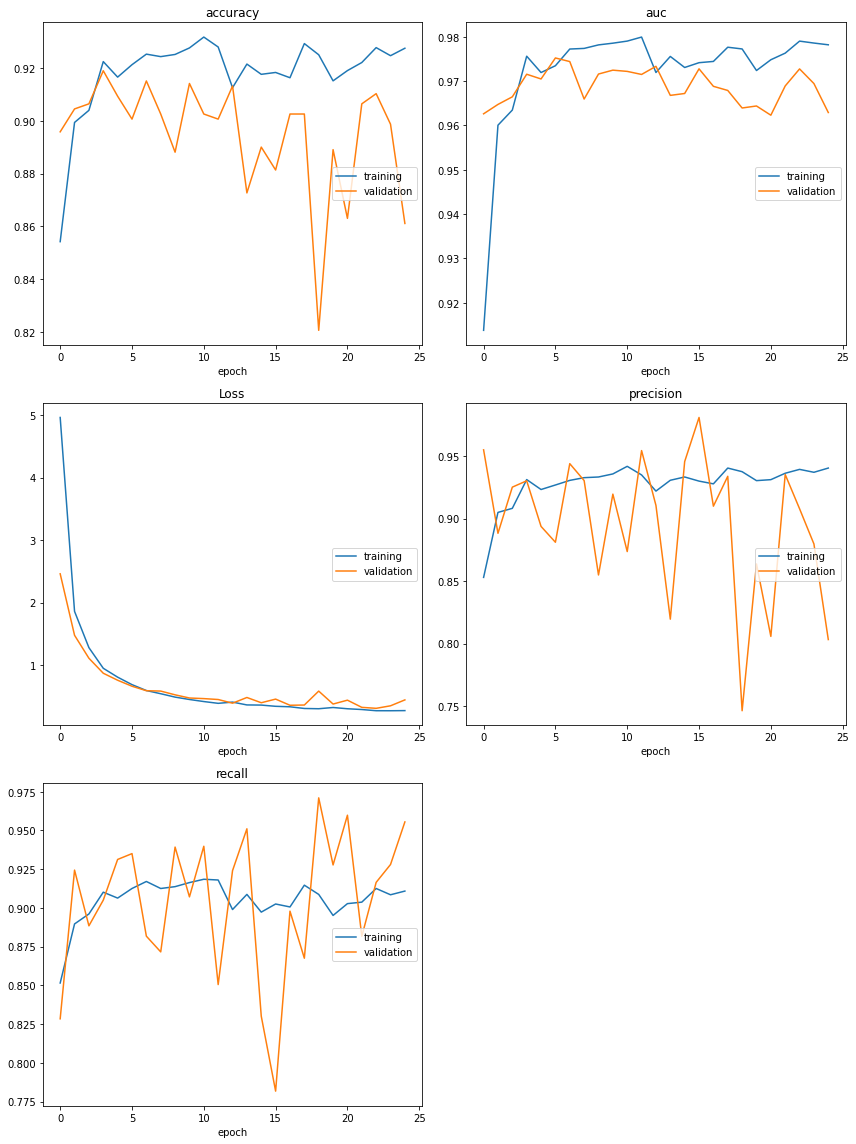

accuracy
	training         	 (min:    0.854, max:    0.932, cur:    0.928)
	validation       	 (min:    0.821, max:    0.919, cur:    0.861)
auc
	training         	 (min:    0.914, max:    0.980, cur:    0.978)
	validation       	 (min:    0.962, max:    0.975, cur:    0.963)
Loss
	training         	 (min:    0.274, max:    4.959, cur:    0.276)
	validation       	 (min:    0.312, max:    2.461, cur:    0.447)
precision
	training         	 (min:    0.853, max:    0.942, cur:    0.940)
	validation       	 (min:    0.746, max:    0.981, cur:    0.803)
recall
	training         	 (min:    0.852, max:    0.919, cur:    0.911)
	validation       	 (min:    0.782, max:    0.971, cur:    0.956)
133/133 [==============================] - 211s 2s/step - loss: 0.2756 - accuracy: 0.9275 - recall: 0.9109 - precision: 0.9405 - auc: 0.9782 - val_loss: 0.4467 - val_accuracy: 0.8611 - val_recall: 0.9555 - val_precision: 0.8033 - val_auc: 0.9629


In [ ]:
h = model_1.fit(train_set,
                epochs=25,
                validation_data=test_set,
                callbacks=callbacks
                )

In [ ]:
model_1.evaluate(test_test_set)

17/17 [==============================] - 10s 579ms/step - loss: 0.4111 - accuracy: 0.8851 - recall: 0.9706 - precision: 0.8289 - auc: 0.9662


[0.41106173396110535,
 0.8851103186607361,
 0.970588207244873,
 0.8288853764533997,
 0.9662072062492371]

In [ ]:
#model_1.save('Models/H-test-TL-resnet-l2-output-t1.h5') 